### Plotting the distribution of kmers for the lambda genome (kmer length 31, genome size ~48,500bp)

[]

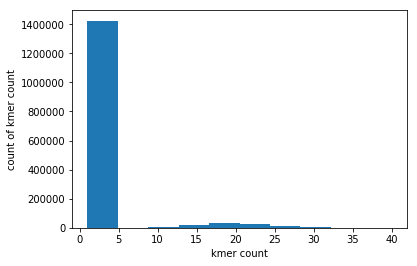

In [39]:
#!/usr/bin/env python3

import sys
import matplotlib.pyplot as plt
import numpy as np
import statistics as st

kmer_length = 31


def kmer_count(filename, kmer_length):
   FILE = open(filename, 'r')
   kmers = {}
   for line in FILE:
    header = line
    seq = next(FILE)
    seq = seq.rstrip()
    plus = next(FILE)
    quality = next(FILE)
    #sliding window
    for i in range(0, len(seq) - kmer_length + 1):
       kmer = seq[i:i + kmer_length]
       if kmer in kmers:  kmers[kmer] += 1
       else:  kmers[kmer] = 1
   return(kmers)

kmers = kmer_count('./data/lambda.r2.no_error.fq', 31)
#Kmers original dictionary


plt.xlabel('kmer count')
plt.ylabel('count of kmer count')
plt.hist(kmers.values())
plt.plot()

#Plot the new dictionary with adjusted bin size

### Removing sequence errors (kmers that are represented only once) and fitting remaining kmers to a normal distribution with 95% CI

6


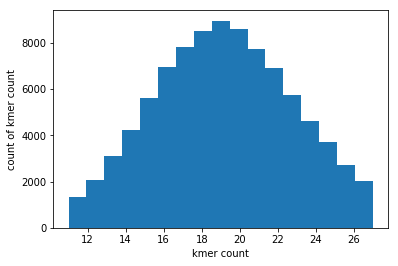

In [40]:
#!/usr/bin/env python3


kmer_count_list = []
for kmer in kmers:
        kmer_count_list.append(kmers[kmer])
kmer_count_list = sorted(kmer_count_list)
#List of all of the counts of how many times kmers appear in parent dictionary

kmer_count_abundance = {}
for i in range(min(kmer_count_list), max(kmer_count_list)+1):
        tempcount = kmer_count_list.count(i)
        kmer_count_abundance[i] = tempcount
#Create a dictionary of all of the kmer appearance counts as keys and their abundances as the values

min_kmer_abun = max(kmer_count_abundance.values())*100
for key, value in sorted(kmer_count_abundance.items(), key = lambda x: x[0]):
        if value < min_kmer_abun:
                min_kmer_abun = value
        else:
                first_infl_point = key-1
                print(first_infl_point)
                break
#Find the first inflection point in the histogram and store it as 'cutoff' in order to create the normal distribution


freq_list_normaldist = []
for key, value in sorted(kmers.items(), key = lambda x: x[0]):
        if value >= first_infl_point:
                freq_list_normaldist.append(value)
#Create the frequency list using the new inflection point and then find the 95% CI of the distribution

normal_dist_mean = sum(freq_list_normaldist)/len(freq_list_normaldist)
normal_dist_std = st.stdev(freq_list_normaldist)
bound1_key = int(normal_dist_mean - (2*normal_dist_std))
bound2_key = int(normal_dist_mean + (2*normal_dist_std))
#Found the mean and standard deviations of the adjusted distribution and used them to find te 95% confidence interval

dist_kmer = []
for kmer in kmers:
        if kmers[kmer] > bound1_key and kmers[kmer] < bound2_key:
                dist_kmer.append(kmers[kmer])
#Create a new dictionary of only kmers within the 95% CI of the adjusted distribution
plt.xlabel('kmer count')
plt.ylabel('count of kmer count')
plt.hist(dist_kmer, bins = (bound2_key - bound1_key-1))
plt.plot()
plt.savefig('graphrealfreqy.png')
#Plot the new dictionary with adjusted bin size

### Fitting remaining kmers to a normal distribution with 99% CI

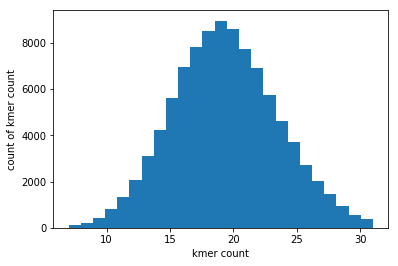

In [41]:
#!/usr/bin/env python3

normal_dist_mean = sum(freq_list_normaldist)/len(freq_list_normaldist)
normal_dist_std = st.stdev(freq_list_normaldist)
bound1_key = int(normal_dist_mean - (3*normal_dist_std))
bound2_key = int(normal_dist_mean + (3*normal_dist_std))
#Found the mean and standard deviations of the adjusted distribution and used them to find te 95% confidence interval

dist_kmer = []
for kmer in kmers:
        if kmers[kmer] > bound1_key and kmers[kmer] < bound2_key:
                dist_kmer.append(kmers[kmer])
#Create a new dictionary of only kmers within the 95% CI of the adjusted distribution

plt.xlabel('kmer count')
plt.ylabel('count of kmer count')
plt.hist(dist_kmer, bins = (bound2_key - bound1_key-1))
plt.plot()
plt.savefig('graphrealfreqy.png')
#Plot the new dictionary with adjusted bin size